In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#Data Collection and Processing
#Loading the Data

In [3]:
insurance_data = pd.read_csv(r"C:\Users\LENOVO\Downloads\insurance.csv")

In [4]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#number of rows and columns
insurance_data.shape

(1338, 7)

In [6]:
#getting the information of the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#Categorical features are sex , smoker and region

In [8]:
#Checking for missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [9]:
# Statistical Measures of the dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

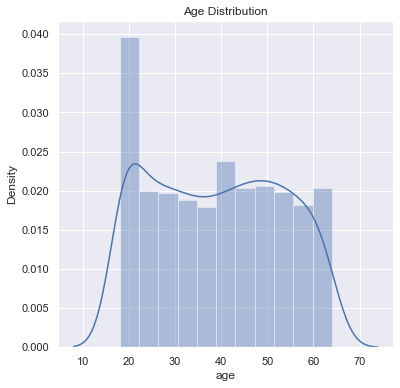

In [10]:
#distribution of the age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show

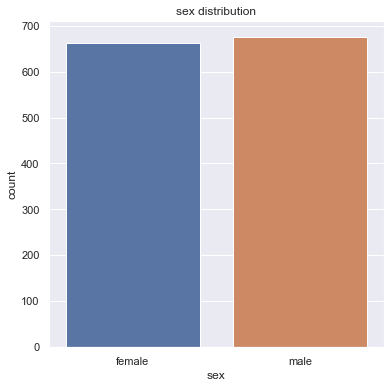

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x= "sex",data=insurance_data)
plt.title("sex distribution")
plt.show()

In [12]:
insurance_data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

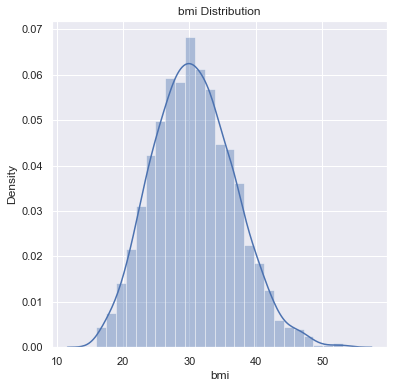

In [13]:
#bmi distribution in dataset
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title('bmi Distribution')
plt.show

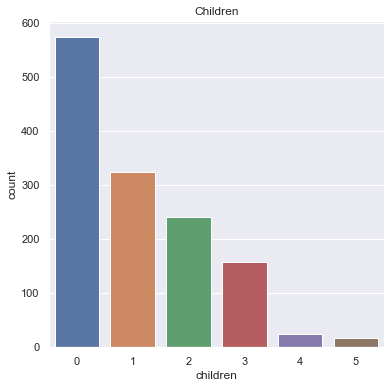

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x= "children",data=insurance_data)
plt.title("Children")
plt.show()

In [15]:
insurance_data["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

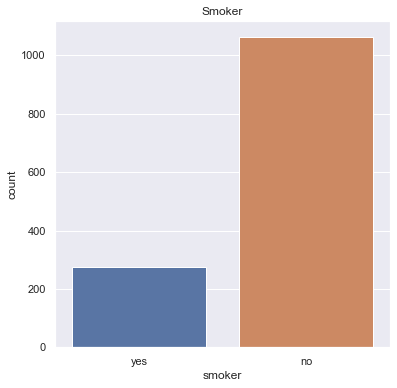

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x= "smoker",data=insurance_data)
plt.title("Smoker")
plt.show()

In [17]:
insurance_data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

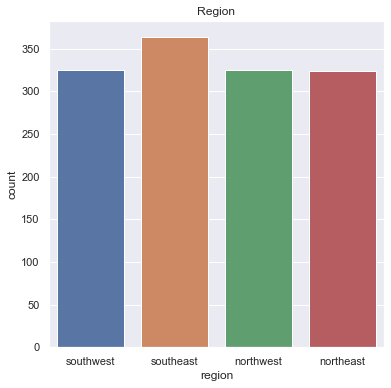

In [18]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x= "region",data=insurance_data)
plt.title("Region")
plt.show()

In [19]:
insurance_data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

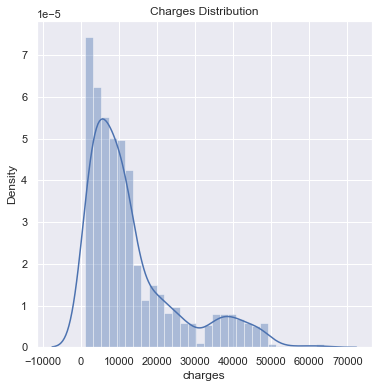

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'])
plt.title('Charges Distribution')
plt.show

Data Pre Processing 

In [21]:
#Encoding the Categorical features

In [22]:
insurance_data.replace({'sex':{'male':0,'female':1}},inplace =True)

insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace =True)

insurance_data.replace({'region':{'southwest':0,'southeast':1,'northeast':2,'northwest':3}}, inplace = True)

In [23]:
#Spliting the dataset

In [24]:
X = insurance_data.iloc[:,0:-1]
Y = insurance_data["charges"]

In [25]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,0
1,18,0,33.770,1,1,1
2,28,0,33.000,3,1,1
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3


In [26]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [27]:
#spliting the the data in train and test

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression Model

In [30]:
#loading the regression model
regressor = LinearRegression()

In [31]:
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [32]:
#prediction of training data
training_data_prediction = regressor.predict(X_train)

In [33]:
# R Squared value

In [34]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value :',r2_train)

R squared value : 0.7516346664929345


In [35]:
#prediction of testing data
testing_data_prediction = regressor.predict(X_test)

In [36]:
r2_test = metrics.r2_score(Y_test, testing_data_prediction)
print('R squared value :',r2_test)

R squared value : 0.7441032539760071


In [37]:
input_data = (25,0,26.22,0,1,2)

In [38]:
#changing input to numpy array
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
Prediction = regressor.predict(input_data_reshaped)
print(Prediction)


[2828.22249745]
